In [ ]:
# %%capture
# pip install NeuralForecast

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/ECL/S/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/ECL/S/df_y.csv')

In [4]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
26299,2019-07-01 21:00:00,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,-0.500000,-0.333333,-0.466667,-0.00137


In [5]:
Y_df

,ds,unique_id,y
0,2016-07-01 02:00:00,OT,-2.162911
1,2016-07-01 03:00:00,OT,-0.949045
2,2016-07-01 04:00:00,OT,-1.077105
3,2016-07-01 05:00:00,OT,-1.129411
4,2016-07-01 06:00:00,OT,-1.154662
...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872
26300,2019-07-01 22:00:00,OT,-1.093338
26301,2019-07-01 23:00:00,OT,-1.282723
26302,2019-07-02 00:00:00,OT,-1.158270


In [6]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [7]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [8]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

## Horizon 96

In [9]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [10]:
Y_train_df = Y_df.iloc[:26208,:]
Y_test_df = Y_df.iloc[26208:,:]

In [11]:
Y_test_df = Y_test_df.reset_index()

In [12]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26208,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,26209,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,26210,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,26211,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,26212,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [13]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [49]:
horizon = 96
model = FEDformer(h=horizon, input_size=24,
               max_steps=5,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [50]:
nf = NeuralForecast(models=[model],freq='H')

In [51]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 362 K 
------------------------------------------------
536 K     Trainable params
0         Non-trainable params
536 K     Total params
2.145     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=5` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [52]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,-1.355183
OT,1,-1.244296
OT,2,-1.296585
OT,3,-1.544944
OT,4,-1.600342
...,...,...
OT,91,-0.510290
OT,92,-0.506764
OT,93,-0.503019


<Axes: xlabel='ds'>

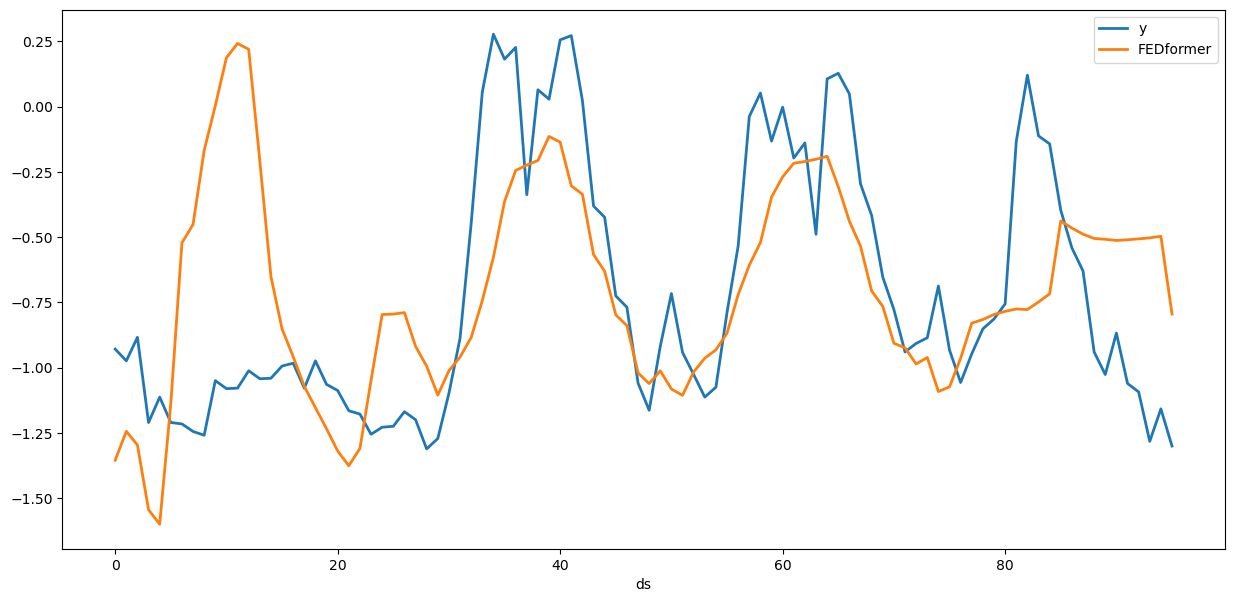

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [54]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,-1.355183
1,-1.244296
2,-1.296585
3,-1.544944
4,-1.600342
...,...
91,-0.510290
92,-0.506764
93,-0.503019


In [55]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.348
FEDformer MSE: 0.212


## Horizon 192

In [56]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [57]:
Y_train_df = Y_df.iloc[:26112,:]
Y_test_df = Y_df.iloc[26112:,:]

In [58]:
Y_test_df = Y_test_df.reset_index()

In [59]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26112,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,26113,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,26114,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,26115,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,26116,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
187,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [60]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [101]:
horizon = 192
model = FEDformer(h=horizon, input_size=24,
               max_steps=5,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [102]:
nf = NeuralForecast(models=[model],freq='H')

In [103]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 403 K 
------------------------------------------------
577 K     Trainable params
0         Non-trainable params
577 K     Total params
2.309     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=5` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [104]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,0.478836
OT,1,0.602623
OT,2,0.603329
OT,3,0.583512
OT,4,0.540229
...,...,...
OT,187,0.170773
OT,188,0.155239
OT,189,0.136827


<Axes: xlabel='ds'>

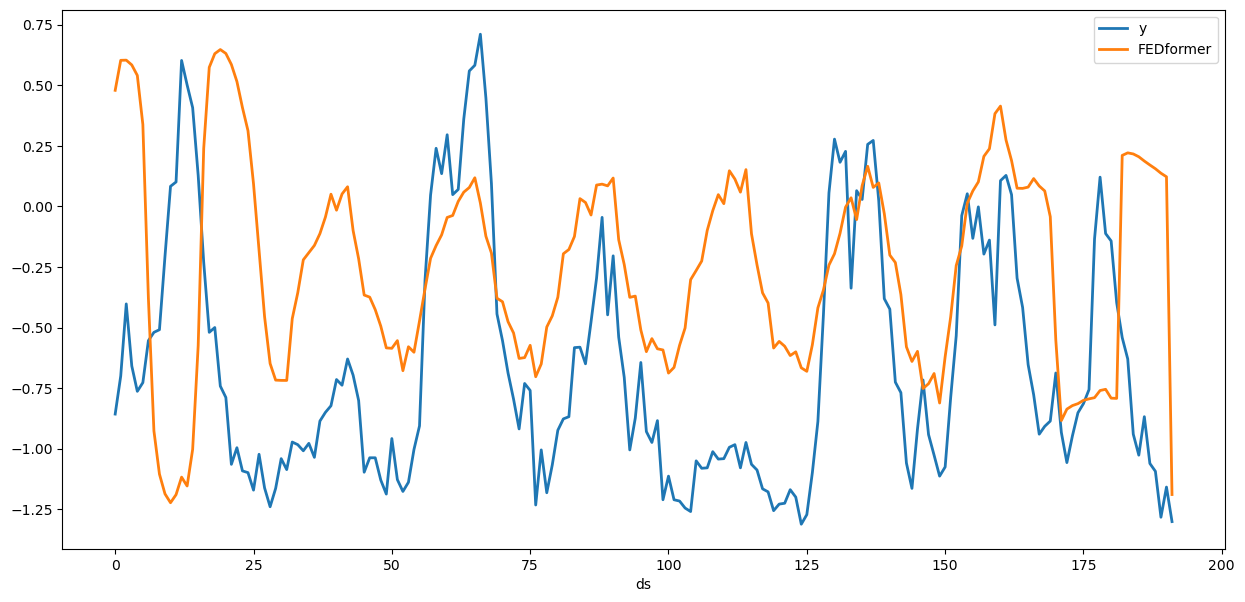

In [105]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [106]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,0.478836
1,0.602623
2,0.603329
3,0.583512
4,0.540229
...,...
187,0.170773
188,0.155239
189,0.136827


In [107]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.613
FEDformer MSE: 0.530


## Horizon 336

In [108]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [109]:
Y_train_df = Y_df.iloc[:25967,:]
Y_test_df = Y_df.iloc[25967:,:]

In [110]:
Y_test_df = Y_test_df.reset_index()

In [111]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25967,2019-06-18 01:00:00,OT,-0.844432,-0.456522,-0.333333,0.066667,-0.039726
1,25968,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
2,25969,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
3,25970,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
4,25971,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
332,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
333,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
334,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
335,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [112]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-18 01:00:00,OT,-0.844432,-0.456522,-0.333333,0.066667,-0.039726
1,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
2,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
3,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
4,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...
332,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
333,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
334,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
335,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [113]:
horizon = 336
model = FEDformer(h=horizon, input_size=24,
               max_steps=7,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [114]:
nf = NeuralForecast(models=[model],freq='H')

In [115]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 403 K 
------------------------------------------------
577 K     Trainable params
0         Non-trainable params
577 K     Total params
2.309     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=7` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [116]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,0.249618
OT,1,0.393000
OT,2,0.399130
OT,3,0.378370
OT,4,0.323424
...,...,...
OT,331,-0.066150
OT,332,-0.085031
OT,333,-0.102189


<Axes: xlabel='ds'>

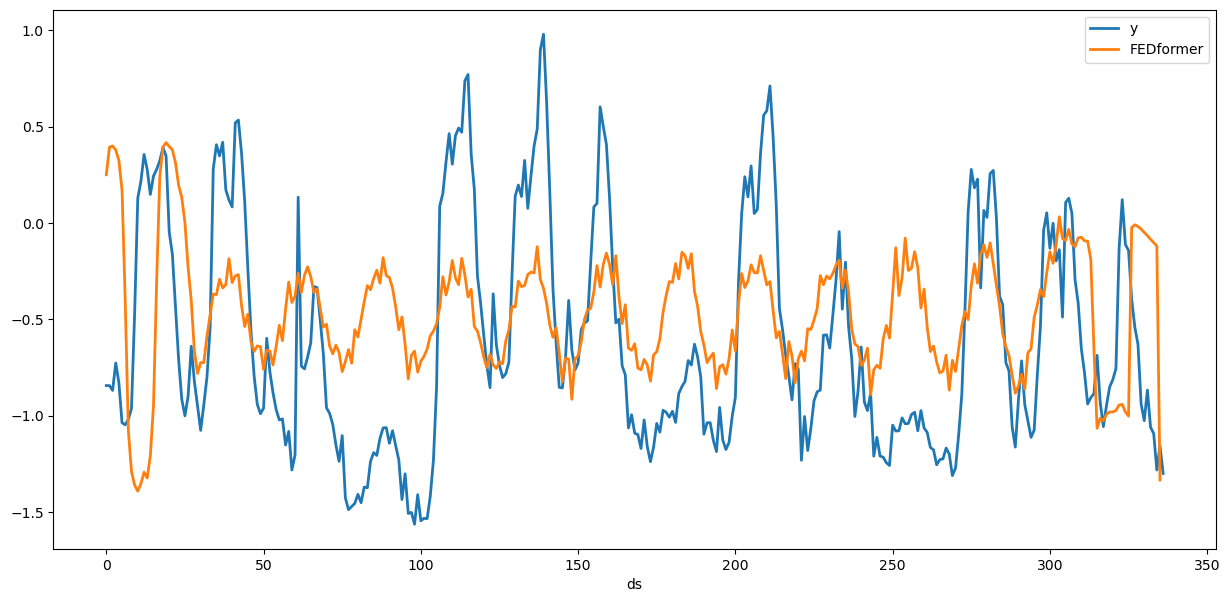

In [117]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [118]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,0.249618
1,0.393000
2,0.399130
3,0.378370
4,0.323424
...,...
331,-0.066150
332,-0.085031
333,-0.102189


In [119]:
from neuralforecast.losses.numpy import mae,mse


mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'N-FEDformer MAE: {mae_FEDformer:.3f}')
print(f'N-FEDformer MSE: {mse_FEDformer:.3f}')

N-FEDformer MAE: 0.492
N-FEDformer MSE: 0.352


## Horizon 720

In [120]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [121]:
Y_train_df = Y_df.iloc[:25583,:]
Y_test_df = Y_df.iloc[25583:,:]

In [122]:
Y_test_df = Y_test_df.reset_index()

In [123]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25583,2019-06-02 01:00:00,OT,-1.010369,-0.456522,0.500000,-0.466667,-0.083562
1,25584,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
2,25585,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
3,25586,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
4,25587,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...,...
716,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
717,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
718,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
719,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [124]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-02 01:00:00,OT,-1.010369,-0.456522,0.500000,-0.466667,-0.083562
1,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
2,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
3,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
4,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...
716,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
717,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
718,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
719,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [132]:
horizon = 720
model = FEDformer(h=horizon, input_size=24,
               max_steps=10,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [133]:
nf = NeuralForecast(models=[model],freq='H')

In [134]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 403 K 
------------------------------------------------
577 K     Trainable params
0         Non-trainable params
577 K     Total params
2.309     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=10` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [135]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,0.111232
OT,1,0.252512
OT,2,0.245057
OT,3,0.196029
OT,4,0.078122
...,...,...
OT,715,-0.230340
OT,716,-0.249198
OT,717,-0.267113


<Axes: xlabel='ds'>

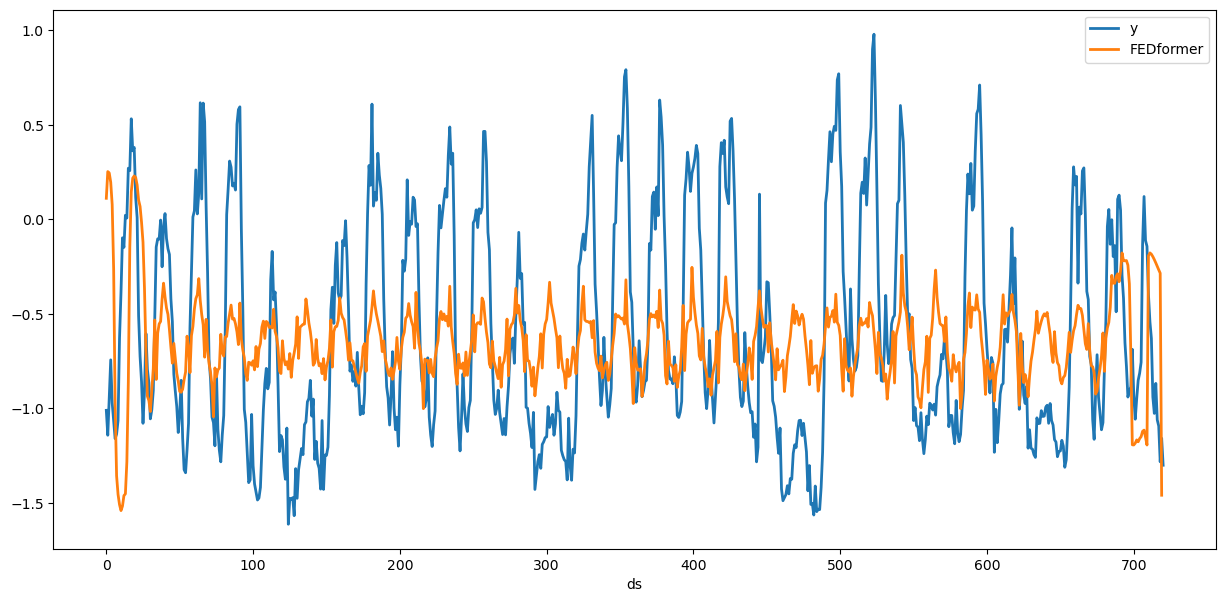

In [136]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [137]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,0.111232
1,0.252512
2,0.245057
3,0.196029
4,0.078122
...,...
715,-0.230340
716,-0.249198
717,-0.267113


In [138]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.448
FEDformer MSE: 0.296
